## Train Vs Test distribution & transformation 

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [11]:
loan_data = pd.read_csv('data/LoanTrainingSetScaledAndOHE.csv', na_values='n/a')
loan_data_2 = pd.read_csv('data/Loan payments data.csv', na_values='n/a')
loan_data.head()

,Loan Status,Current Loan Amount,Credit Score,Years in current job,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,...,Purpose_EducationalExpenses,Purpose_HomeImprovements,Purpose_HomePurchase,Purpose_MajorPurchase,Purpose_MedicalBills,Purpose_Moving,Purpose_Other,Purpose_RenewableEnergyPurchase,Purpose_Vacation,Purpose_Wedding
0,1,2.00,0.84,-0.48,0.84,0.29,0.18,-0.34,0.82,0.19,...,0,0,0,0,0,0,0,0,0,0
1,1,0.32,0.49,0.91,-1.97,0.77,1.79,-0.34,0.56,1.05,...,0,0,0,0,0,0,0,0,0,0
2,1,-1.06,1.10,-1.31,-1.46,-0.48,-0.83,-0.34,-0.70,-0.55,...,0,0,0,0,0,0,1,0,0,0
3,1,-0.87,-0.63,1.19,2.00,1.47,0.58,-0.34,-0.08,-0.22,...,0,1,0,0,0,0,0,0,0,0
4,0,1.06,-1.31,-0.20,0.07,1.53,-0.83,-0.34,-0.21,-0.38,...,0,0,0,0,0,0,0,0,0,0


In [12]:
loan_data_2.head()

,Loan_ID,loan_status,Principal,terms,effective_date,due_date,paid_off_time,past_due_days,age,education,Gender
0,xqd20166231,PAIDOFF,1000,30,9/8/2016,10/7/2016,9/14/2016 19:31,NaN,45,High School or Below,male
1,xqd20168902,PAIDOFF,1000,30,9/8/2016,10/7/2016,10/7/2016 9:00,NaN,50,Bechalor,female
2,xqd20160003,PAIDOFF,1000,30,9/8/2016,10/7/2016,9/25/2016 16:58,NaN,33,Bechalor,female
3,xqd20160004,PAIDOFF,1000,15,9/8/2016,9/22/2016,9/22/2016 20:00,NaN,27,college,male
4,xqd20160005,PAIDOFF,1000,30,9/9/2016,10/8/2016,9/23/2016 21:36,NaN,28,college,female


In [17]:
loan_data['Loan Status'].value_counts()

1    35809
0    14191
Name: Loan Status, dtype: int64

<Figure size 432x288 with 0 Axes>

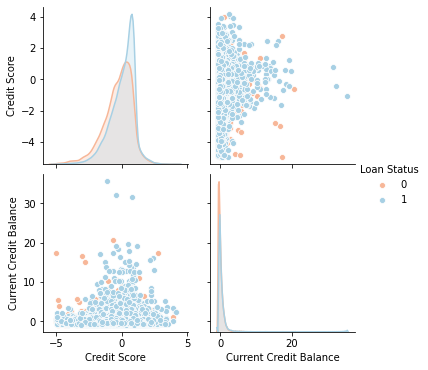

In [18]:
# Create `loan_data` subset: loan_data_subset
loan_data_subset = loan_data[['Credit Score','Current Credit Balance', 'Loan Status']]

# Create train and test sets
trainingSet, testSet = train_test_split(loan_data_subset, test_size=0.2, random_state=123)

# Examine pairplots training set
plt.figure()
sns.pairplot(trainingSet, hue='Loan Status', palette='RdBu')
plt.show()

<Figure size 432x288 with 0 Axes>

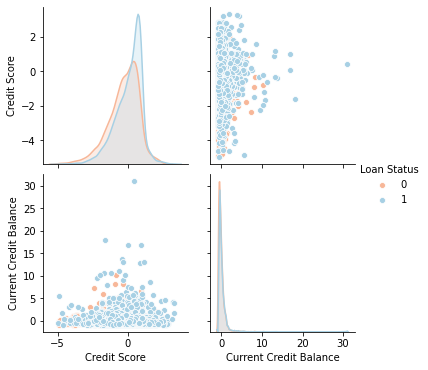

In [19]:
# test set
plt.figure()
sns.pairplot(testSet, hue='Loan Status', palette='RdBu')
plt.show()

#### trainingSet and testSet have different distributions when conditioned on the Loan Status target variable

### Task : using the log and power transformation from the scipy.stats module on the "Principal" feature of loan_data along with the distplot() function from seaborn, which plots both its distribution and kernel density estimation.

0.1156     1015
0.0289      929
0.0001      893
0.0049      838
0.2704      795
           ... 
14.0625       1
7.3441        1
16.3216       1
12.4609       1
11.7649       1
Name: Years of Credit History, Length: 319, dtype: int64


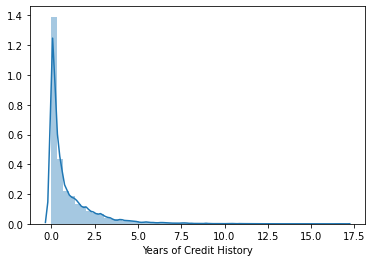

In [26]:
# Subset loan_data
cr_yrs = loan_data['Years of Credit History'].apply(lambda x:x**2)
print(cr_yrs.value_counts())
# Histogram and kernel density estimate
plt.figure()
sns.distplot(cr_yrs,kde=True)
plt.show()

- Apply a log transformation using the Box-Cox transformation to cr_yrs and plot its distribution and kde.

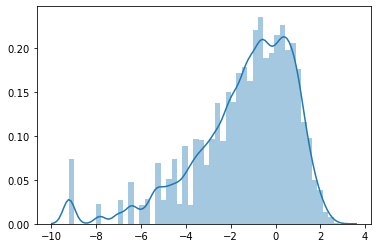

In [27]:
from scipy.stats import boxcox
# Subset loan_data
# cr_yrs = loan_data['Years of Credit History']

# Box-Cox transformation
cr_yrs_log = boxcox(cr_yrs, lmbda=0.0)

# Histogram and kernel density estimate
plt.figure()
sns.distplot(cr_yrs_log)
plt.show()

- Transform 'Years of Credit History' using the Box-Cox square-root argument and plot its distribution and kde.

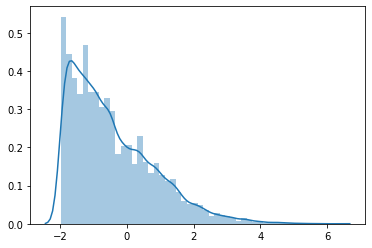

In [28]:
# Square root transform
cr_yrs_sqrt = boxcox(cr_yrs, lmbda=0.5)

# Histogram and kernel density estimate
plt.figure()
sns.distplot(cr_yrs_sqrt)
plt.show()

### Outlier detection

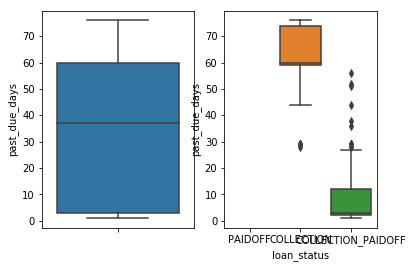

In [31]:
# Univariate and multivariate boxplots
fig, ax =plt.subplots(1,2)
sns.boxplot(y=loan_data['past_due_days'], ax=ax[0])
sns.boxplot(x='loan_status', y='past_due_days', data=loan_data, ax=ax[1])
plt.show()

### Handling outliers
- Another convenient way for handling outliers is by calculating the Z-score which gives a threshold for outliers approximately +/-3 standard deviations away from the mean.
- **Task** :  use the scipy.stats module to calculate the Z-score using the `stats.zscore()` function and the `mstats.winsorize()` function to replace outliers using a technique called Winsorizing. 

In [52]:
from scipy import stats
import numpy as np

numeric_cols = loan_data.select_dtypes(include=['int', 'float64'])
# categoric_cols = loan_data[['loan_status', 'education', 'Gender']]
categoric_cols = pd.DataFrame()

In [49]:
# Print: before dropping
print(numeric_cols.mean())
print(numeric_cols.median())
print(numeric_cols.max())

# Create index of rows to keep
idx = (np.abs(stats.zscore(numeric_cols)) < 3).all(axis=1)

# Concatenate numeric and categoric subsets
ld_out_drop = pd.concat([numeric_cols.loc[idx], categoric_cols.loc[idx]], axis=1)

# Print: after dropping
print(ld_out_drop.mean())
print(ld_out_drop.median())
print(ld_out_drop.max())

Principal        943.200
terms             22.824
past_due_days     36.010
age               31.116
dtype: float64
Principal        1000.0
terms              30.0
past_due_days      37.0
age                30.0
dtype: float64
Principal        1000.0
terms              30.0
past_due_days      76.0
age                51.0
dtype: float64
Principal       NaN
terms           NaN
past_due_days   NaN
age             NaN
dtype: float64
Principal       NaN
terms           NaN
past_due_days   NaN
age             NaN
dtype: float64
Principal       NaN
terms           NaN
past_due_days   NaN
age             NaN
dtype: float64


C:\Users\Shubham\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in less
  import sys


In [45]:
# Print: before winsorize
print((loan_data['terms']).mean())
print((loan_data['terms']).median())
print((loan_data['terms']).max())

# Winsorize numeric columns
debt_win = stats.mstats.winsorize(loan_data['terms'], limits=[0.05, 0.05])

# Convert to DataFrame, reassign column name
debt_out = pd.DataFrame(debt_win, columns=['terms'])

# Print: after winsorize
print(debt_out.mean())
print(debt_out.median())
print(debt_out.max())

22.824
30.0
30
terms    23.16
dtype: float64
terms    30.0
dtype: float64
terms    30
dtype: int64


In [56]:
# Print: before replace with median
print((loan_data['terms']).mean())
print((loan_data['terms']).median())
print((loan_data['terms']).max())

# Find median
median = loan_data.loc[loan_data['terms'] < 2120, 'terms'].median()
loan_data['terms'] = np.where(loan_data['terms'] > 2120, median, loan_data['terms'])

print((loan_data['terms']).mean())
print((loan_data['terms']).median())
print((loan_data['terms']).max())

22.824
30.0
30
22.824
30.0
30.0


### Z-score standardization
- We calculated the Z-score to address outliers.Another question might be where else Z-scores are used. They are often used for scaling your data prior to creating a model.
- `sklearn.preprocessing` :  standardize the numeric feature columns in the loan_data dataset. Recall that this scales the data so that it has a mean of 0 and standard deviation of 1.

In [55]:
# Subset features
numeric_cols = loan_data.select_dtypes(include=[np.number])
categoric_cols = loan_data.select_dtypes(include=[object])

# Instantiate
scaler = StandardScaler()

# Fit and transform, convert to DF
numeric_cols_scaled = scaler.fit_transform(numeric_cols)
numeric_cols_scaledDF = pd.DataFrame(numeric_cols_scaled, columns=numeric_cols.columns)

# Concatenate categoric columns to scaled numeric columns
final_DF = pd.concat([numeric_cols_scaledDF, categoric_cols], axis=1)
print(final_DF.head())

C:\Users\Shubham\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)


   Principal     terms  past_due_days       age      Loan_ID loan_status  \
0   0.493377  0.897891            NaN  2.284043  xqd20166231     PAIDOFF   
1   0.493377  0.897891            NaN  3.106587  xqd20168902     PAIDOFF   
2   0.493377  0.897891            NaN  0.309935  xqd20160003     PAIDOFF   
3   0.493377 -0.978972            NaN -0.677119  xqd20160004     PAIDOFF   
4   0.493377  0.897891            NaN -0.512610  xqd20160005     PAIDOFF   

  effective_date   due_date    paid_off_time             education  Gender  
0       9/8/2016  10/7/2016  9/14/2016 19:31  High School or Below    male  
1       9/8/2016  10/7/2016   10/7/2016 9:00              Bechalor  female  
2       9/8/2016  10/7/2016  9/25/2016 16:58              Bechalor  female  
3       9/8/2016  9/22/2016  9/22/2016 20:00               college    male  
4       9/9/2016  10/8/2016  9/23/2016 21:36               college  female  


C:\Users\Shubham\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
